<center><H1 style = "color: green">GERMAN CREDIT RISK ANALYSIS</H1> </center>

***

## Contents

German Credit Dataset
1. Age (numeric)
2. Sex (text: male, female)
3. Job (numeric: 0 - unskilled and non-resident, 1 - unskilled and resident, 2 - skilled, 3 - highly skilled)
4. Housing (text: own, rent, or free)
5. Saving accounts (text - little, moderate, quite rich, rich)
6. Checking account (numeric, in DM - Deutsch Mark)
7. Credit amount (numeric, in DM)
8. Duration (numeric, in month)
9. Purpose (text: car, furniture/equipment, radio/TV, domestic appliances, repairs, education, business, vacation/others)


#### Import Libraries

In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 

#### Load 'german_credit_data.csv' and store it in a dataframe

In [2]:
df=pd.read_csv('german_credit_data.csv')

#### View top 5 rows

In [3]:
df.head(5)

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,2,49,male,1,own,little,NaN,2096,12,education,good
3,3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,4,53,male,2,free,little,little,4870,24,car,bad


#### Do data analysis with the dataset ( shape of dataset,columns,null objects,unique elements)

#### Shape

In [4]:
df.shape

(1000, 11)

#### Columns

In [5]:
df.columns

Index(['Unnamed: 0', 'Age', 'Sex', 'Job', 'Housing', 'Saving accounts',
       'Checking account', 'Credit amount', 'Duration', 'Purpose', 'Risk'],
      dtype='object')

#### Number of null objects in each column

In [6]:
df.isna().sum()

Unnamed: 0            0
Age                   0
Sex                   0
Job                   0
Housing               0
Saving accounts     183
Checking account    394
Credit amount         0
Duration              0
Purpose               0
Risk                  0
dtype: int64

### Fill all null objects with 'Unknown'

In [7]:
df=df.fillna('Unknown') 

In [8]:
df.isna().sum()

Unnamed: 0          0
Age                 0
Sex                 0
Job                 0
Housing             0
Saving accounts     0
Checking account    0
Credit amount       0
Duration            0
Purpose             0
Risk                0
dtype: int64

#### Unique elements in each column

In [9]:
for column in df.columns:
    print(column,':',df[column].unique())


Unnamed: 0 : [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233
 234 235 236 237 238 239 240 241 242 2

##### Create a New column Id by replacing unnamed column

In [10]:
df.rename({'Unnamed: 0':'Id'},axis=1,inplace=True) 

In [11]:
df 

,Id,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,0,67,male,2,own,Unknown,little,1169,6,radio/TV,good
1,1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,2,49,male,1,own,little,Unknown,2096,12,education,good
3,3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,4,53,male,2,free,little,little,4870,24,car,bad
...,...,...,...,...,...,...,...,...,...,...,...
995,995,31,female,1,own,little,Unknown,1736,12,furniture/equipment,good
996,996,40,male,3,own,little,little,3857,30,car,good
997,997,38,male,2,own,little,Unknown,804,12,radio/TV,good
998,998,23,male,2,free,little,little,1845,45,radio/TV,bad


#### Find the information of the dataset


In [12]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Id                1000 non-null   int64 
 1   Age               1000 non-null   int64 
 2   Sex               1000 non-null   object
 3   Job               1000 non-null   int64 
 4   Housing           1000 non-null   object
 5   Saving accounts   1000 non-null   object
 6   Checking account  1000 non-null   object
 7   Credit amount     1000 non-null   int64 
 8   Duration          1000 non-null   int64 
 9   Purpose           1000 non-null   object
 10  Risk              1000 non-null   object
dtypes: int64(5), object(6)
memory usage: 86.1+ KB


#### Find basic statistical information about the dataset

In [13]:
df.describe()

,Id,Age,Job,Credit amount,Duration
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,499.500000,35.546000,1.904000,3271.258000,20.903000
std,288.819436,11.375469,0.653614,2822.736876,12.058814
min,0.000000,19.000000,0.000000,250.000000,4.000000
25%,249.750000,27.000000,2.000000,1365.500000,12.000000
50%,499.500000,33.000000,2.000000,2319.500000,18.000000
75%,749.250000,42.000000,2.000000,3972.250000,24.000000
max,999.000000,75.000000,3.000000,18424.000000,72.000000


#### Fetch the following groupby results

In [14]:
sex_grp=df.groupby(['Sex','Risk'])

In [15]:
sex_grp['Purpose'].value_counts()

Sex     Risk  Purpose            
female  bad   car                     40
              furniture/equipment     28
              radio/TV                19
              education                9
              business                 7
              domestic appliances      2
              repairs                  2
              vacation/others          2
        good  radio/TV                66
              car                     54
              furniture/equipment     46
              education               15
              business                12
              domestic appliances      4
              repairs                  3
              vacation/others          1
male    bad   car                     66
              radio/TV                43
              furniture/equipment     30
              business                27
              education               14
              repairs                  6
              vacation/others          3
              domestic 

In [16]:
sex_grp=df.groupby(['Purpose','Risk'])

In [17]:
sex_grp['Sex'].value_counts()

Purpose              Risk  Sex   
business             bad   male       27
                           female      7
                     good  male       51
                           female     12
car                  bad   male       66
                           female     40
                     good  male      177
                           female     54
domestic appliances  bad   female      2
                           male        2
                     good  female      4
                           male        4
education            bad   male       14
                           female      9
                     good  male       21
                           female     15
furniture/equipment  bad   male       30
                           female     28
                     good  male       77
                           female     46
radio/TV             bad   male       43
                           female     19
                     good  male      152
                       

In [18]:
df['Purpose'].unique()

array(['radio/TV', 'education', 'furniture/equipment', 'car', 'business',
       'domestic appliances', 'repairs', 'vacation/others'], dtype=object)

## <span style = "color: orange"> Data Visualization </span>

### Plot the graphs shown below

In [ ]:
sns.countplot(x='Risk',data=df)

In [ ]:
sns.countplot(x='Sex',hue='Risk',data=df)

In [ ]:
plt.figure(figsize=(10,8))
sns.countplot(x='Duration',hue='Risk',data=df)

In [ ]:
plt.figure(figsize=(10,10))
sns.countplot(x='Sex',hue='Job',data=df)

In [ ]:
sns.countplot(x='Risk',hue='Housing',data=df)

In [ ]:
df['Purpose'].unique()

In [ ]:
df

In [ ]:
plt.figure(figsize=(15,6))
index=df.set_index('Purpose')
plt.subplot(2,4,1)
a=sns.countplot(x='Risk',hue='Sex',data=index.loc['radio/TV'])
a.set_title('radio/title')

plt.subplot(2,4,2)
b=sns.countplot(x='Risk',hue='Sex',data=index.loc['education']) 
b.set_title('education')

plt.subplot(2,4,3)
c=sns.countplot(x='Risk',hue='Sex',data=index.loc['furniture/equipment']) 
c.set_title('furniture/equipment')

plt.subplot(2,4,4)
d=sns.countplot(x='Risk',hue='Sex',data=index.loc['car']) 
d.set_title('car')

plt.subplot(2,4,5)
e=sns.countplot(x='Risk',hue='Sex',data=index.loc['business']) 
e.set_title('business')

plt.subplot(2,4,6)
f=sns.countplot(x='Risk',hue='Sex',data=index.loc['domestic appliances']) 
f.set_title('domestic appliances')

plt.subplot(2,4,7)
g=sns.countplot(x='Risk',hue='Sex',data=index.loc['repairs']) 
g.set_title('repairs')

plt.subplot(2,4,8)
h=sns.countplot(x='Risk',hue='Sex',data=index.loc['vacation/others']) 
h.set_title('vacation/others')

In [ ]:
purpose=['radio/TV', 'education', 'furniture/equipment', 'car', 'business',
       'domestic appliances', 'repairs', 'vacation/others']

In [ ]:
sns.pairplot(data=df)

#### Convert purpose column using Dummy variables

In [19]:
newdf=pd.get_dummies(columns=['Purpose'],data=df,drop_first=True) 

In [20]:
newdf

,Id,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Risk,Purpose_car,Purpose_domestic appliances,Purpose_education,Purpose_furniture/equipment,Purpose_radio/TV,Purpose_repairs,Purpose_vacation/others
0,0,67,male,2,own,Unknown,little,1169,6,good,0,0,0,0,1,0,0
1,1,22,female,2,own,little,moderate,5951,48,bad,0,0,0,0,1,0,0
2,2,49,male,1,own,little,Unknown,2096,12,good,0,0,1,0,0,0,0
3,3,45,male,2,free,little,little,7882,42,good,0,0,0,1,0,0,0
4,4,53,male,2,free,little,little,4870,24,bad,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,995,31,female,1,own,little,Unknown,1736,12,good,0,0,0,1,0,0,0
996,996,40,male,3,own,little,little,3857,30,good,1,0,0,0,0,0,0
997,997,38,male,2,own,little,Unknown,804,12,good,0,0,0,0,1,0,0
998,998,23,male,2,free,little,little,1845,45,bad,0,0,0,0,1,0,0


In [21]:
df['Housing'].unique()

array(['own', 'free', 'rent'], dtype=object)

#### Use label encoding for rest of the categorical data

In [22]:
from sklearn.preprocessing import LabelEncoder

In [23]:
le=LabelEncoder()

In [24]:
newdf['Sex']=le.fit_transform(newdf['Sex'])

In [25]:
newdf['Saving accounts']=le.fit_transform(newdf['Saving accounts']) 

In [26]:
newdf['Checking account']=le.fit_transform(newdf['Checking account'])

In [27]:
newdf['Housing']=le.fit_transform(newdf['Housing'])

In [28]:
newdf.head()

,Id,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Risk,Purpose_car,Purpose_domestic appliances,Purpose_education,Purpose_furniture/equipment,Purpose_radio/TV,Purpose_repairs,Purpose_vacation/others
0,0,67,1,2,1,0,1,1169,6,good,0,0,0,0,1,0,0
1,1,22,0,2,1,1,2,5951,48,bad,0,0,0,0,1,0,0
2,2,49,1,1,1,1,0,2096,12,good,0,0,1,0,0,0,0
3,3,45,1,2,0,1,1,7882,42,good,0,0,0,1,0,0,0
4,4,53,1,2,0,1,1,4870,24,bad,1,0,0,0,0,0,0


In [29]:
newdf.drop(columns=['Saving accounts','Checking account'],inplace=True)

In [30]:
newdf.head(1) 

,Id,Age,Sex,Job,Housing,Credit amount,Duration,Risk,Purpose_car,Purpose_domestic appliances,Purpose_education,Purpose_furniture/equipment,Purpose_radio/TV,Purpose_repairs,Purpose_vacation/others
0,0,67,1,2,1,1169,6,good,0,0,0,0,1,0,0


### Check the unique values in the new dataframe

In [31]:
for column in newdf.columns:
    print('unique values are:',column,':',newdf[column].unique())  

unique values are: Id : [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233
 234 235 236 237 238 239 24

In [32]:
newdf.drop(columns=['Id'],inplace=True)

In [33]:
newdf

,Age,Sex,Job,Housing,Credit amount,Duration,Risk,Purpose_car,Purpose_domestic appliances,Purpose_education,Purpose_furniture/equipment,Purpose_radio/TV,Purpose_repairs,Purpose_vacation/others
0,67,1,2,1,1169,6,good,0,0,0,0,1,0,0
1,22,0,2,1,5951,48,bad,0,0,0,0,1,0,0
2,49,1,1,1,2096,12,good,0,0,1,0,0,0,0
3,45,1,2,0,7882,42,good,0,0,0,1,0,0,0
4,53,1,2,0,4870,24,bad,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,31,0,1,1,1736,12,good,0,0,0,1,0,0,0
996,40,1,3,1,3857,30,good,1,0,0,0,0,0,0
997,38,1,2,1,804,12,good,0,0,0,0,1,0,0
998,23,1,2,0,1845,45,bad,0,0,0,0,1,0,0


## Select the Dependent(target) and Independent Variables:

In [34]:
X=newdf.drop(columns=['Risk'])

In [35]:
X.head(10)

,Age,Sex,Job,Housing,Credit amount,Duration,Purpose_car,Purpose_domestic appliances,Purpose_education,Purpose_furniture/equipment,Purpose_radio/TV,Purpose_repairs,Purpose_vacation/others
0,67,1,2,1,1169,6,0,0,0,0,1,0,0
1,22,0,2,1,5951,48,0,0,0,0,1,0,0
2,49,1,1,1,2096,12,0,0,1,0,0,0,0
3,45,1,2,0,7882,42,0,0,0,1,0,0,0
4,53,1,2,0,4870,24,1,0,0,0,0,0,0
5,35,1,1,0,9055,36,0,0,1,0,0,0,0
6,53,1,2,1,2835,24,0,0,0,1,0,0,0
7,35,1,3,2,6948,36,1,0,0,0,0,0,0
8,61,1,1,1,3059,12,0,0,0,0,1,0,0
9,28,1,3,1,5234,30,1,0,0,0,0,0,0


In [36]:
y=newdf['Risk']

In [37]:
newdf.head(1)

,Age,Sex,Job,Housing,Credit amount,Duration,Risk,Purpose_car,Purpose_domestic appliances,Purpose_education,Purpose_furniture/equipment,Purpose_radio/TV,Purpose_repairs,Purpose_vacation/others
0,67,1,2,1,1169,6,good,0,0,0,0,1,0,0


In [38]:
newdf['Risk'].unique()

array(['good', 'bad'], dtype=object)

## plot Heatmap

<AxesSubplot:>

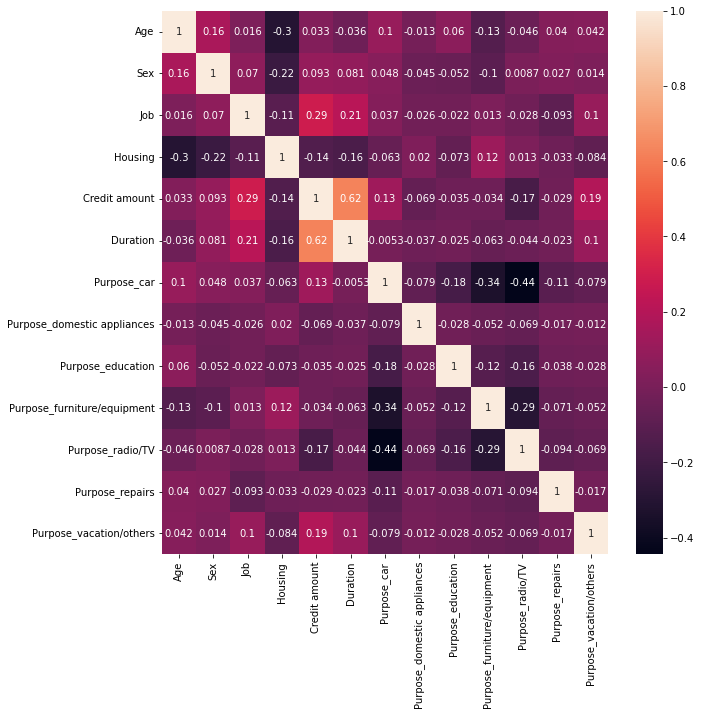

In [39]:
plt.figure(figsize=(10,10))
sns.heatmap(newdf.corr(),annot=True) 

# Standardize the data

In [40]:
from sklearn.preprocessing import StandardScaler


In [41]:
scaler=StandardScaler()

In [42]:
newdf=pd.DataFrame(scaler.fit_transform(X),columns=X.columns)

In [43]:
newdf

,Age,Sex,Job,Housing,Credit amount,Duration,Purpose_car,Purpose_domestic appliances,Purpose_education,Purpose_furniture/equipment,Purpose_radio/TV,Purpose_repairs,Purpose_vacation/others
0,2.766456,0.670280,0.146949,-0.133710,-0.745131,-1.236478,-0.712949,-0.110208,-0.250398,-0.470108,1.603567,-0.149983,-0.110208
1,-1.191404,-1.491914,0.146949,-0.133710,0.949817,2.248194,-0.712949,-0.110208,-0.250398,-0.470108,1.603567,-0.149983,-0.110208
2,1.183312,0.670280,-1.383771,-0.133710,-0.416562,-0.738668,-0.712949,-0.110208,3.993639,-0.470108,-0.623610,-0.149983,-0.110208
3,0.831502,0.670280,0.146949,-2.016956,1.634247,1.750384,-0.712949,-0.110208,-0.250398,2.127172,-0.623610,-0.149983,-0.110208
4,1.535122,0.670280,0.146949,-2.016956,0.566664,0.256953,1.402626,-0.110208,-0.250398,-0.470108,-0.623610,-0.149983,-0.110208
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,-0.399832,-1.491914,-1.383771,-0.133710,-0.544162,-0.738668,-0.712949,-0.110208,-0.250398,2.127172,-0.623610,-0.149983,-0.110208
996,0.391740,0.670280,1.677670,-0.133710,0.207612,0.754763,1.402626,-0.110208,-0.250398,-0.470108,-0.623610,-0.149983,-0.110208
997,0.215835,0.670280,0.146949,-0.133710,-0.874503,-0.738668,-0.712949,-0.110208,-0.250398,-0.470108,1.603567,-0.149983,-0.110208
998,-1.103451,0.670280,0.146949,-2.016956,-0.505528,1.999289,-0.712949,-0.110208,-0.250398,-0.470108,1.603567,-0.149983,-0.110208


In [44]:
def risk(x):
    if x=='good':
        return 1
    else:
        return 0

In [47]:
df['Risk']=df['Risk'].apply(risk)

In [48]:
df['Risk'].unique()

array([1, 0], dtype=int64)

In [49]:
df

,Id,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,0,67,male,2,own,Unknown,little,1169,6,radio/TV,1
1,1,22,female,2,own,little,moderate,5951,48,radio/TV,0
2,2,49,male,1,own,little,Unknown,2096,12,education,1
3,3,45,male,2,free,little,little,7882,42,furniture/equipment,1
4,4,53,male,2,free,little,little,4870,24,car,0
...,...,...,...,...,...,...,...,...,...,...,...
995,995,31,female,1,own,little,Unknown,1736,12,furniture/equipment,1
996,996,40,male,3,own,little,little,3857,30,car,1
997,997,38,male,2,own,little,Unknown,804,12,radio/TV,1
998,998,23,male,2,free,little,little,1845,45,radio/TV,0


# Split the data into training and testing set

In [50]:
from sklearn.model_selection import train_test_split


In [51]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

# Models:

## Random Forest Classifier.
** Let's choose the best estimator and parameters :GridSearchCV**

In [52]:
#let's check what params will be best suitable for random forest classification.
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.model_selection import cross_val_score

In [ ]:
RandomForestClassifier()

In [ ]:
params={'n_estimators':list(range(1,50)),'max_depth':[None,1,2,3],'random_state':[None,1,2,3]}

In [ ]:
gsv=GridSearchCV(RandomForestClassifier(),params,cv=5,scoring='accuracy')

In [ ]:
gsv.fit(X_train,y_train)

In [ ]:
gsv.score(X_train,y_train)

In [ ]:
gsv.best_params_

In [ ]:
gsv.best_score_

In [ ]:
model=RandomForestClassifier(n_estimators=2)

In [ ]:
model.fit(X_train,y_train)

In [ ]:
model.score(X_train,y_train)

In [ ]:
y_pred=model.predict(X_test)

### Check the accuracy score, Confusion metrics, Classification report and Cross val score

In [ ]:
metrics.accuracy_score(y_test,y_pred)

In [ ]:
metrics.confusion_matrix(y_test,y_pred)

In [ ]:
print(metrics.classification_report(y_test,y_pred))

#### Visualize the confusion matrix

In [ ]:
sns.heatmap(metrics.confusion_matrix(y_test,y_pred),annot=True)

In [ ]:
cross_val_score(RandomForestClassifier(n_estimators=2),X,y,cv=5)

## SupportVectorClassifier:

In [53]:
from sklearn.svm import SVC

In [54]:
model2=SVC()

In [55]:
model2.fit(X_train,y_train)

SVC()

In [56]:
model2.score(X_train,y_train)

0.71

In [57]:
y_pred=model2.predict(X_test)

In [58]:
metrics.accuracy_score(y_test,y_pred)

0.7

In [59]:
metrics.confusion_matrix(y_test,y_pred)

array([[  6,  59],
       [  1, 134]], dtype=int64)

In [60]:
print(metrics.classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         bad       0.86      0.09      0.17        65
        good       0.69      0.99      0.82       135

    accuracy                           0.70       200
   macro avg       0.78      0.54      0.49       200
weighted avg       0.75      0.70      0.61       200



<AxesSubplot:>

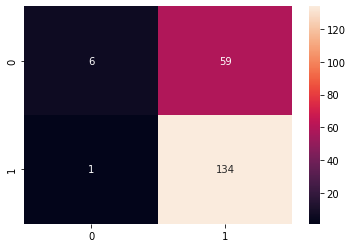

In [61]:
sns.heatmap(metrics.confusion_matrix(y_test,y_pred),annot=True,fmt='d') 

In [62]:
param_grid={'C':[0.1,1,10,100],'degree':[3,4,5],'kernel':['rbf','poly','sigmoid']}

In [63]:
grid=GridSearchCV(SVC(),param_grid,cv=3)

In [64]:
grid.fit(X_train,y_train)

GridSearchCV(cv=3, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100], 'degree': [3, 4, 5],
                         'kernel': ['rbf', 'poly', 'sigmoid']})

In [65]:
grid.best_params_

{'C': 10, 'degree': 5, 'kernel': 'poly'}

In [66]:
grid.best_score_

0.7150038016389288

## LogisticRegression

In [74]:
from sklearn.linear_model import LogisticRegression

In [75]:
model3=LogisticRegression()

In [76]:
model3.fit(X_train,y_train)

LogisticRegression()

In [77]:
model3.score(X_train,y_train)

0.715

In [78]:
y_pre=model3.predict(X_test)

In [79]:
metrics.accuracy_score(y_test,y_pred)

0.7

In [80]:
metrics.confusion_matrix(y_test,y_pred)

array([[  6,  59],
       [  1, 134]], dtype=int64)

In [81]:
print(metrics.classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         bad       0.86      0.09      0.17        65
        good       0.69      0.99      0.82       135

    accuracy                           0.70       200
   macro avg       0.78      0.54      0.49       200
weighted avg       0.75      0.70      0.61       200



## AdaBoost: Classifier

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
model4=AdaBoostClassifier(DecisionTreeClassifier())

In [ ]:
model4.fit(X_train,y_train)

In [ ]:
model4.score(X_train,y_train)

#### View scores of the different models 

## ANALYZING THE RESULTS

**So now we have to decide which one is the best model, and we have two types of wrong values:**

* False Positive, means they won't pay the loan(Risk:Yes), but the model thinks they will.
* False Negative, means they will pay the loan(Risk:No), but the model said they won't.

**In my opinion:**

* Length of the dataset isn't enough, we need more data for better accuracy.

## PCA to Speed up Machine Learning Algorithms (Logistic Regression)
Step 0: Import and use PCA. After PCA you will apply a machine learning algorithm of your choice to the transformed data

In [ ]:
from sklearn.decomposition import PCA


In [ ]:
pca=PCA(n_components=6)

In [ ]:
X_pca=pd.DataFrame(pca.fit_transform(newdf))

In [ ]:
X_pca.shape


In [ ]:
newdf.shape

In [ ]:
X_train_pca,X_test_pca,y_train,y_test=train_test_split(X_pca,y,test_size=0.2)

In [ ]:
model5=LogisticRegression()

In [ ]:
model5.fit(X_train_pca,y_train)

In [ ]:
model5.score(X_test_pca,y_test)

**Step 1: Import the model you want to use**

In sklearn, all machine learning models are implemented as Python classes

In [ ]:
from sklearn.linear_model import LogisticRegression


**Step 2: Make an instance of the Model**

In [ ]:
# all parameters not specified are set to their defaults
# default solver is incredibly slow thats why we change it
# solver = 'lbfgs'
logisticRegr = LogisticRegression(solver = 'lbfgs')

In [ ]:
logisticRegr.fit(X_train,y_train)

In [ ]:
logisticRegr.score(X_train,y_train)

In [ ]:
y_pred1=logisticRegr.predict(X_test)

In [ ]:
#Confusion Matrix
from sklearn import metrics

In [ ]:
metrics.confusion_matrix(y_test,y_pred1)

## Model Deployment With Tkinter

### Import Tkinter Library

In [ ]:
X.head(1)

In [92]:
from tkinter import *
from tkinter .ttk import Combobox

In [96]:
window=Tk()
window.title('german credit risk analysis')
window.geometry('400x600')
titlelabel=Label(window,text='GERMAN CREDIT RISK ANALYSIS ',bg='blue',fg='white').pack(fill='both')
Label(window).pack()

def getpredict():
    Age1=Age.get()
    sex1=sex.get()
    job1=job.get()
    Housing1=Housing.get()
    credit1=credit.get()
    duration1=duration.get()
    purposecar1=purposecar.get()
    
    if sex1=='Male':
        sex1=0
    else:
        sex1=1
    
    
    if purposecar1=='Car':
        Car=1
        Domestic=0
        Education=0
        Furniture=0
        Radio=0
        Repairs=0
        Vacation=0
    elif purposecar1=='Domestic':
        Car=0
        Domestic=1
        Education=0
        Furniture=0
        Radio=0
        Repairs=0
        Vacation=0
    elif purposecar1=='Education':
        Car=0
        Domestic=0
        Education=1
        Furniture=0
        Radio=0
        Repairs=0
        Vacation=0
    elif purposecar1=='Furniture':
        Car=0
        Domestic=0
        Education=0
        Furniture=1
        Radio=0
        Repairs=0
        Vacation=0
    elif purposecar1=='Radio':
        Car=0
        Domestic=0
        Education=0
        Furniture=0
        Radio=1
        Repairs=0
        Vacation=0
    elif purposecar1=='Repairs':
        Car=0
        Domestic=0
        Education=0
        Furniture=0
        Radio=0
        Repairs=1
        Vacation=0
    else:
        Car=0
        Domestic=0
        Education=0
        Furniture=0
        Radio=0
        Repairs=0
        Vacation=1
    x=scaler.transform([[Age1,sex1,job1,Housing1,credit1,duration1,Car,Domestic,Education,Furniture,Radio,Repairs,Vacation]])
    prediction=model3.predict(x)
    result.delete(0,END)
    if prediction[0]==0:
        result.insert(0,'not servived')
    else:
        result.insert(0,'servived')
    

In [97]:
agelabel=Label(window,text='Age').pack()
Age=Entry(window)
Age.pack()

sexlabel=Label(window,text='Sex').pack()
sex=Combobox(window)
sex['values']=['Male','Female']
sex.pack()
Label(window).pack()

joblabel=Label(window,text='Job').pack()
job=Entry(window)
job.pack()
Label(window).pack()

Housinglabel=Label(window,text='Housing').pack()
Housing=Entry(window)
Housing.pack()
Label(window).pack()

crdamntlabel=Label(window,text='Credit Amount').pack()
credit=Entry(window)
credit.pack()
Label(window).pack()

durtnlabel=Label(window,text='Duration').pack()
duration=Entry(window)
duration.pack()
Label(window).pack()

purposecarlabel=Label(window,text='Purpose').pack()
purposecar=Combobox(window)
purposecar['values']=('Car','Domestic ','Education','Furniture','Radio','Repairs','Vacation')
purposecar.current(0)
purposecar.pack()
Label(window).pack()

button=Button(window,text='Get Prediction',command=getpredict)
button.pack()

result=Entry(window)
result.pack()



In [98]:
window.mainloop()

C:\Users\TOSHIBA\anaconda3\condabin\anacoda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\TOSHIBA\anaconda3\condabin\anacoda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\TOSHIBA\anaconda3\condabin\anacoda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\TOSHIBA\anaconda3\condabin\anacoda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\TOSHIBA\anaconda3\condabin\anacoda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.war

C:\Users\TOSHIBA\anaconda3\condabin\anacoda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\TOSHIBA\anaconda3\condabin\anacoda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\TOSHIBA\anaconda3\condabin\anacoda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\TOSHIBA\anaconda3\condabin\anacoda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\TOSHIBA\anaconda3\condabin\anacoda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.war